# Score : 0.76555

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_index = train_df.index
test_index = test_df.index
train_index, test_index

(Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
            dtype='int64', name='PassengerId', length=891),
 Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
             ...
             1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
            dtype='int64', name='PassengerId', length=418))

## Data processing

### 1. null drop

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [10]:
train_df.isnull().sum() / len(train_df) * 100

Survived    0.00
Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

In [11]:
## Cabin 번역
test_df['Cabin'] = test_df.Cabin.fillna('').apply(lambda x: len(x.split()))
train_df['Cabin'] = train_df.Cabin.fillna('').apply(lambda x: len(x.split()))
train_df['Cabin'].head()

PassengerId
1    0
2    1
3    0
4    1
5    0
Name: Cabin, dtype: int64

In [12]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,1,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,1,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,0,S


In [13]:
all_df = train_df.append(test_df, sort=False)
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,0,S
2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,1,C
3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,0,S
4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,1,S
5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,0,S
6,0.00,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,0,Q
7,0.00,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,1,S
8,0.00,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,0,S
9,1.00,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,0,S


In [14]:
sex_dict = {'male': 0, 'female': 1}
all_df['Sex'] = all_df['Sex'].apply(lambda x: sex_dict[x])
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.00,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.25,0,S
2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.28,1,C
3,1.00,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.92,0,S
4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.10,1,S
5,0.00,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.05,0,S


In [15]:
del all_df['Name']

In [16]:
del all_df['Ticket']

In [17]:
all_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
embarked_dict = {'S':1, 'C':2, 'Q':3, '0': 0}
all_df['Embarked'] = all_df['Embarked'].fillna('0').apply(lambda x: embarked_dict[x])
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0.00,3,0,22.00,1,0,7.25,0,1
2,1.00,1,1,38.00,1,0,71.28,1,2
3,1.00,3,1,26.00,0,0,7.92,0,1
4,1.00,1,1,35.00,1,0,53.10,1,1
5,0.00,3,0,35.00,0,0,8.05,0,1


In [19]:
all_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,1309.00,1309.00
mean,0.38,2.29,0.36,29.88,0.50,0.39,33.30,0.27,1.39
std,0.49,0.84,0.48,14.41,1.04,0.87,51.76,0.57,0.66
min,0.00,1.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,21.00,0.00,0.00,7.90,0.00,1.00
50%,0.00,3.00,0.00,28.00,0.00,0.00,14.45,0.00,1.00
75%,1.00,3.00,1.00,39.00,1.00,0.00,31.27,0.00,2.00
max,1.00,3.00,1.00,80.00,8.00,9.00,512.33,4.00,3.00


In [20]:
all_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Cabin         0
Embarked      0
dtype: int64

In [21]:
all_df.groupby(['Pclass', 'Sex', 'SibSp', 'Cabin'])['Age'].mean()

Pclass  Sex  SibSp  Cabin
1       0    0      0       41.21
                    1       41.79
                    2       31.00
                    3       39.33
             1      0       45.50
                    1       41.35
                    2       31.99
                    3       64.00
                    4       61.00
             2      0       50.00
                    1       44.00
                    4       13.00
             3      3       19.00
        1    0      0       35.57
                    1       35.42
                    2       42.00
                    3       58.00
             1      0       44.67
                    1       39.40
                    2       26.43
                    3       60.00
                    4       48.00
             2      1       55.67
                    4       19.50
             3      3       25.00
2       0    0      0       32.11
                    1       28.50
             1      0       30.98
                    1 

In [22]:
all_df.groupby(['Pclass', 'Sex', 'SibSp', 'Cabin'])['Age'].apply(lambda x: x.fillna(x.mean())).head()

PassengerId
1   22.00
2   38.00
3   26.00
4   35.00
5   35.00
Name: Age, dtype: float64

In [23]:
all_df['Age'] = all_df.groupby(['Pclass', 'Sex', 'SibSp', 'Cabin'])['Age'].apply(lambda x: x.fillna(x.mean()))
all_df['Age'] = all_df.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

In [24]:
all_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin         0
Embarked      0
dtype: int64

In [25]:
all_df['Fare'] = all_df['Fare'].fillna(all_df['Fare'].mean())

In [26]:
all_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [27]:
all_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.00,1309.00,1309.00,1309.00,1309.00,1309.00,1309.00,1309.00,1309.00
mean,0.38,2.29,0.36,29.57,0.50,0.39,33.30,0.27,1.39
std,0.49,0.84,0.48,13.20,1.04,0.87,51.74,0.57,0.66
min,0.00,1.00,0.00,0.17,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,22.00,0.00,0.00,7.90,0.00,1.00
50%,0.00,3.00,0.00,28.21,0.00,0.00,14.45,0.00,1.00
75%,1.00,3.00,1.00,36.00,1.00,0.00,31.27,0.00,2.00
max,1.00,3.00,1.00,80.00,8.00,9.00,512.33,4.00,3.00


In [28]:
all_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.00,-0.34,0.54,-0.06,-0.04,0.08,0.26,0.28,0.10
Pclass,-0.34,1.00,-0.12,-0.44,0.06,0.02,-0.56,-0.62,0.04
Sex,0.54,-0.12,1.00,-0.08,0.11,0.21,0.19,0.12,0.12
Age,-0.06,-0.44,-0.08,1.00,-0.24,-0.15,0.19,0.25,-0.01
SibSp,-0.04,0.06,0.11,-0.24,1.00,0.37,0.16,0.04,-0.07
Parch,0.08,0.02,0.21,-0.15,0.37,1.00,0.22,0.14,-0.09
Fare,0.26,-0.56,0.19,0.19,0.16,0.22,1.00,0.63,0.06
Cabin,0.28,-0.62,0.12,0.25,0.04,0.14,0.63,1.00,0.03
Embarked,0.10,0.04,0.12,-0.01,-0.07,-0.09,0.06,0.03,1.00


In [29]:
del all_df['Age']
del all_df['SibSp']
del all_df['Parch']
del all_df['Embarked']

['', 'Survived', 'Pclass', 'Sex', 'Fare', 'Cabin']


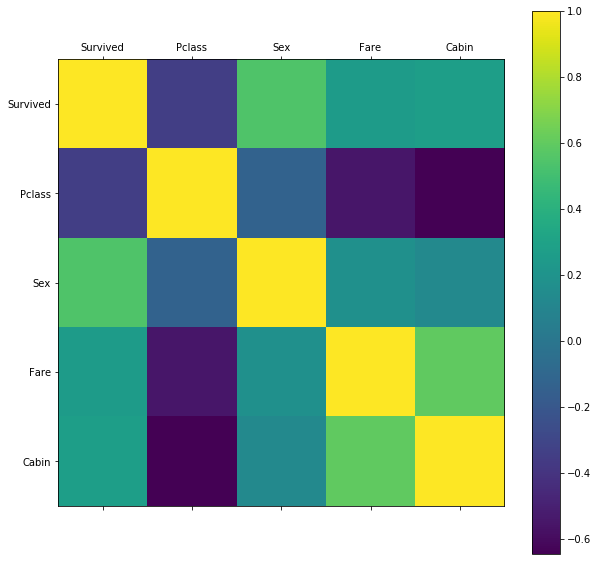

,Survived,Pclass,Sex,Fare,Cabin
Survived,1.00,-0.34,0.54,0.26,0.28
Pclass,-0.34,1.00,-0.13,-0.55,-0.65
Sex,0.54,-0.13,1.00,0.18,0.13
Fare,0.26,-0.55,0.18,1.00,0.60
Cabin,0.28,-0.65,0.13,0.60,1.00


In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(all_df.dropna().corr())
print([''] + list(all_df.columns))
ax.set_xticklabels([""] + list(all_df.columns))
ax.set_yticklabels([""] + list(all_df.columns))
fig.colorbar(cax)
plt.show()
all_df.dropna().corr()

'\ncorr check\n'

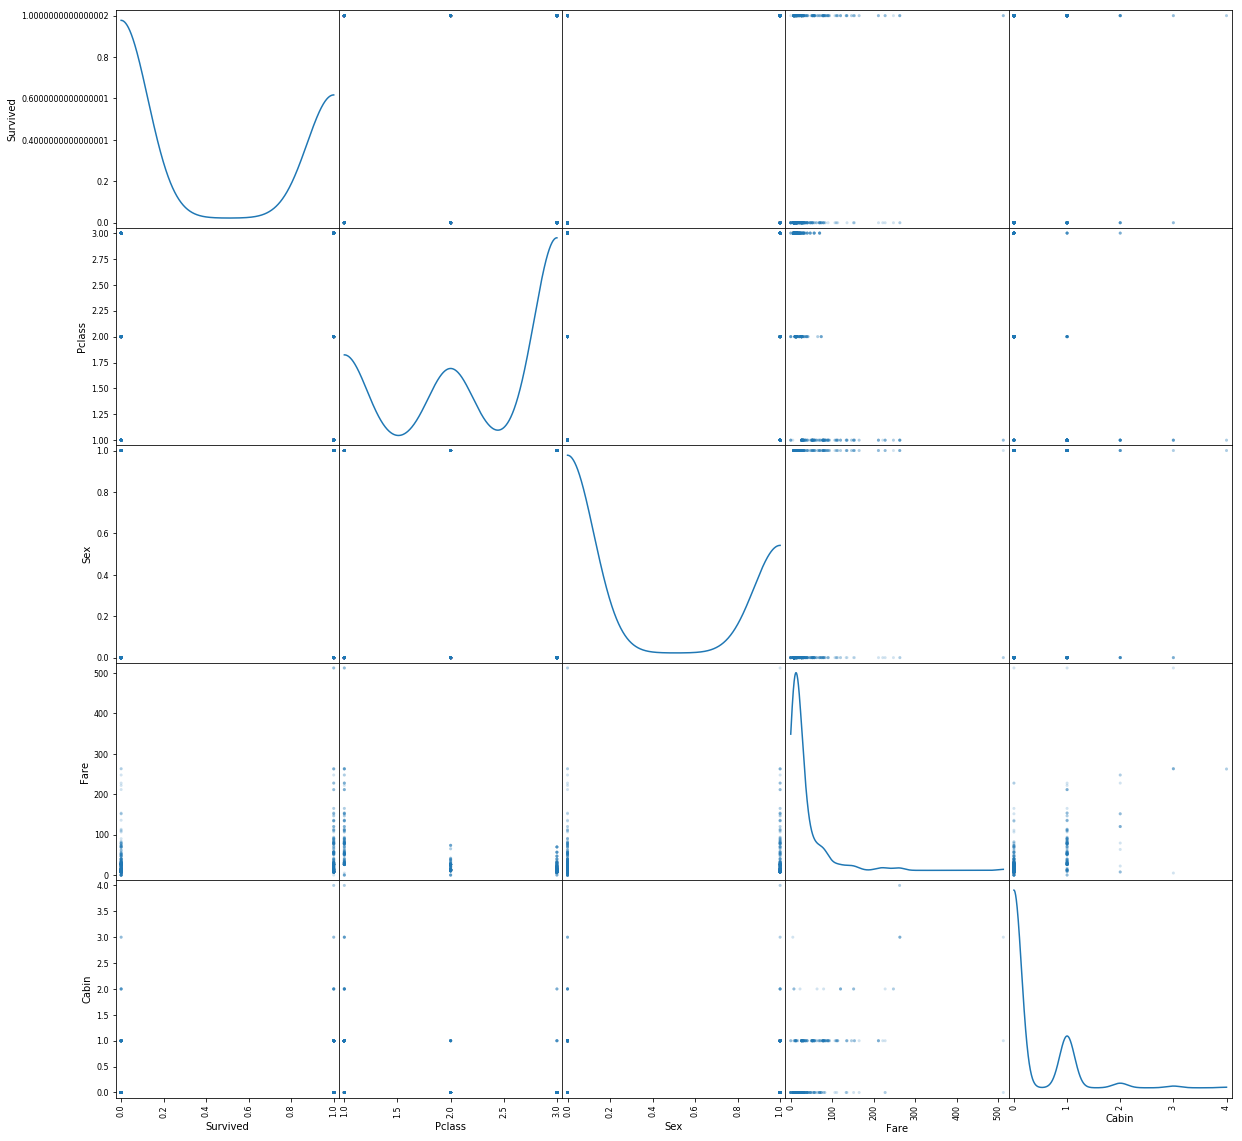

In [31]:
from pandas.plotting import scatter_matrix

scatter_matrix(all_df.dropna(), alpha=0.2, figsize=(20, 20), diagonal='kde')
'''
corr check
'''

C:\Users\pmon2\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:242: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


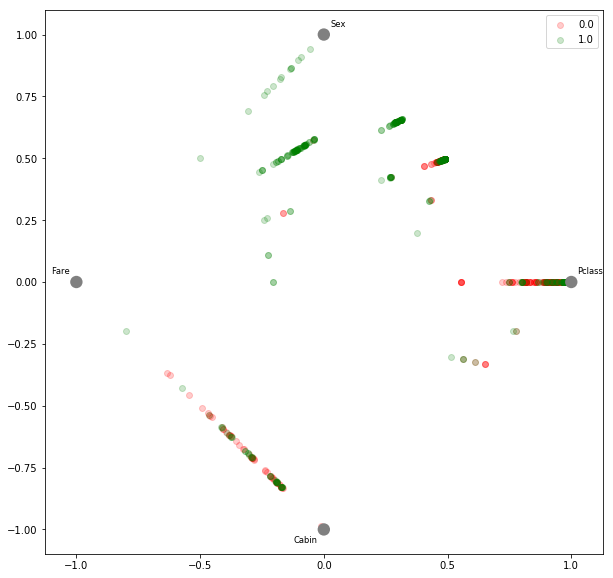

In [32]:
from pandas.plotting import radviz

plt.figure(figsize=(10,10))
radviz(all_df.dropna(), 'Survived', color=['red', 'green'], alpha=0.2)


## Build model

In [33]:
# all_df => test_df
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]
test_df.pop('Survived')


PassengerId
892    nan
893    nan
894    nan
895    nan
896    nan
897    nan
898    nan
899    nan
900    nan
901    nan
902    nan
903    nan
904    nan
905    nan
906    nan
907    nan
908    nan
909    nan
910    nan
911    nan
912    nan
913    nan
914    nan
915    nan
916    nan
917    nan
918    nan
919    nan
920    nan
921    nan
        ..
1280   nan
1281   nan
1282   nan
1283   nan
1284   nan
1285   nan
1286   nan
1287   nan
1288   nan
1289   nan
1290   nan
1291   nan
1292   nan
1293   nan
1294   nan
1295   nan
1296   nan
1297   nan
1298   nan
1299   nan
1300   nan
1301   nan
1302   nan
1303   nan
1304   nan
1305   nan
1306   nan
1307   nan
1308   nan
1309   nan
Name: Survived, Length: 418, dtype: float64

In [34]:
y_train_df = train_df.pop('Survived')
y_train_df.head()

PassengerId
1   0.00
2   1.00
3   1.00
4   1.00
5   0.00
Name: Survived, dtype: float64

In [35]:
x_data = train_df.values
y_data = y_train_df.values

In [36]:
x_data.shape, y_data.shape

((891, 4), (891,))

In [37]:
test_df

,Pclass,Sex,Fare,Cabin
PassengerId,,,,
892,3,0,7.83,0
893,3,1,7.00,0
894,2,0,9.69,0
895,3,0,8.66,0
896,3,1,12.29,0
897,3,0,9.22,0
898,3,1,7.63,0
899,2,0,29.00,0
900,3,1,7.23,0


In [38]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
cls.intercept_

array([0.18738482])

In [40]:
cls.coef_

array([[-7.84018060e-01,  2.54338814e+00,  5.37356752e-04,
         3.23975268e-01]])

In [41]:
cls.predict(test_df.values)

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [42]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [43]:
x_test = test_df.values
y_test = cls.predict(x_test)
y_test

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [44]:
test_values = test_index.values.reshape(-1, 1)
predict_values = cls.predict(x_test).reshape(-1, 1)
result = np.concatenate((test_values, predict_values), axis = 1)
result = result.astype(np.int32)
result[:5]


array([[892,   0],
       [893,   1],
       [894,   0],
       [895,   0],
       [896,   1]])

In [45]:
df_sub = pd.DataFrame(result, columns=['PassengerId', 'Survived'])
df_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [46]:
df_sub.to_csv("sub_result2.csv", index=False)